# Лабораторная работа №2

## по курсу "Системы аналитических вычислений"

### студент: Ляшун Д.С.
# Задание 1 - Применение численных методов
## Вариант А

In [1]:
var("x")
func = x^3 - 9*x^2 + 23*x - 15
show(latex("Функция y(x) = " + str(func)))

\text{\texttt{Функция{ }y(x){ }={ }x{\char`\^}3{ }{-}{ }9*x{\char`\^}2{ }+{ }23*x{ }{-}{ }15}}

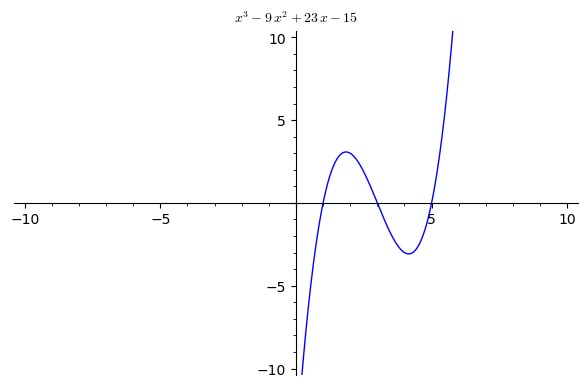

In [2]:
x_min, x_max, y_min, y_max = -10, 10, -10, 10
plot.options["xmin"] = x_min
plot.options["xmax"] = x_max
plot.options["ymin"] = y_min
plot.options["ymax"] = y_max

plot(func, title="${}$".format(latex(func)))

### 1. Нахождение корней уравнения методом Ньютона:

In [3]:
def newton(f, a, b, EPS):
    frames = []
    if a >= b:
        return "Error! Wrong boundaries of the input segment!", frames
    x1 = a
    x2 = (a + b) / 2
    
    df = f.derivative()
    while abs(x2 - x1) >= EPS:
        x1 = x2
        x2 = x1 - f(x = x1)/df(x = x1)
        if len(frames) < 6:
            l = df(x = x1)*(x - x1) + f(x = x1)
            p = plot(f, title="${}$".format(latex(f)), xmin = x_min, xmax = x_max) + plot(l, color="red", xmin = x_min, xmax = x_max) + text((r"$y={}$" + "\n" + r"$x_1={}, x_2={}$").format(latex(l), x1, x2), (1.2, -15), fontsize=10, color="black")
            frames.append(p)
    return "x = " + str(x1), frames

In [4]:
EPS = 1e-5
@interact
def _(a = (x_min, x_max, 0.1), b = (x_min, x_max, 0.1)):
    result, frames = newton(func, a, b, EPS)
    if len(frames) != 0:
        graphics_array(frames, 3, 2).show(figsize = 10)
    show(result)

Interactive function <function _ at 0x6fff02c7def0> with 2 widgets
  a: FloatSlider(value=0.0, description='a'…

### 2. Нахождение корней уравнения методом дихотомии:

In [5]:
def dichotomy(f, a, b, EPS, ITER):
    frames = []
    if a >= b:
        return "Error! Wrong boundaries of the input segment!", frames
    k = 0
    while b - a > EPS and k < ITER:
        if len(frames) < 6:
            p = plot(f, title="${}$".format(latex(f)), xmin = x_min, xmax = x_max) + point((a, f(x = a)), color = "red", size = 10, zorder = 10) + point((b, f(x = b)), color = "red", size = 10, zorder = 10) + text("a", (a+0.5, f(x = a)+1), fontsize=10, color="black") + text("b", (b+0.5, f(x = b)+1), fontsize=10, color = "black")
            frames.append(p)
        m = (b + a) / 2
        if f(x = m) * f(x = a) <= 0:
            b = m
        else:
            a = m
        k += 1
    return "x = " + str((b+a) / 2), frames

In [6]:
ITER = 1000
@interact
def _(a = (x_min, x_max, 0.1), b = (x_min, x_max, 0.1)):
    result, frames = dichotomy(func, a, b, EPS, ITER)
    if len(frames) != 0:
        graphics_array(array = frames, nrows = 3, ncols = 2).show(figsize = 10)
    show(result)

Interactive function <function _ at 0x6fff02c95b00> with 2 widgets
  a: FloatSlider(value=0.0, description='a'…

### 3. Корни уравнения, найденные аналитически

In [17]:
solutions = solve(func == 0, x)
for i, sol in enumerate(solutions):
    show(LatexExpr("x_{" + str(i+1) + "} = " + str(sol.rhs())))

x_{1} = 1

x_{2} = 5

x_{3} = 3

# Задание 2 - Нахождение НОД полиномов
## Вариант 3

In [18]:
R.<x> = RR["x"]
show("Полиномы на кольце R=", R, ": ")
f = 126*x^6 - 54*x^5 - 28*x^3 + 12*x^2 + 14*x - 6
g = -42*x^5 + 39*x^4 - 9*x^3 - 189*x + 81
show(LatexExpr("f(x) = " + str(f)))
show(LatexExpr("g(x) = " + str(g)))

'Полиномы на кольце R=' Univariate Polynomial Ring in x over Real Field with 53 bits of precision ': '

f(x) = 126.000000000000*x^6 - 54.0000000000000*x^5 - 28.0000000000000*x^3 + 12.0000000000000*x^2 + 14.0000000000000*x - 6.00000000000000

g(x) = -42.0000000000000*x^5 + 39.0000000000000*x^4 - 9.00000000000000*x^3 - 189.000000000000*x + 81.0000000000000

### 1. Нахождение НОД с помощью расширенного алгоритма Евклида

In [19]:
def bezout(a, b):
    '''An implementation of extended Euclidean algorithm.
    Returns integer x, y and gcd(a, b) for Bezout equation:
        ax + by = gcd(a, b).
    '''
    x, xx, y, yy = 1, 0, 0, 1
    while b:
        q = a // b
        c = b
        b = a % c
        a = c
        # a, b = b, a % b
        x, xx = xx, x - xx*q
        y, yy = yy, y - yy*q
    value = a.coefficients()[-1]
    a /= a.coefficients()[-1] # для того, чтобы ответ не отличался от найденного с помощью встроенного gcd
    x /= value
    y /= value
    return (x, y, a)

In [20]:
answer = bezout(f, g)
show("HОД(f, g) = ", answer[-1])
show("Коэффициенты Безу: ")
show("u = ", answer[0])
show("v = ", answer[1])
show("f*u + g*v = ", f*answer[0]+g*answer[1])

'HОД(f, g) = ' x - 0.428571428571428

'Коэффициенты Безу: '

'u = ' 0.000411101404322321*x^3 - 0.000395038422706578*x^2 + 0.0000800172368183829*x + 0.000100694913596773

'v = ' 0.00123330421296696*x^4 - 0.000568463161636252*x^3 - 0.0000441798703629785*x^2 + 5.92720272728014e-6*x - 0.00528354640851664

'f*u + g*v = ' -1.38777878078145e-17*x^9 + 1.38777878078145e-17*x^8 + 4.16333634234434e-17*x^7 + 5.68121938382404e-17*x^6 - 1.17961196366423e-16*x^5 - 1.38777878078145e-17*x^4 + 1.20910226275583e-15*x^3 + 9.02056207507940e-16*x^2 + x - 0.428571428571429

Получившиеся малые коэффициенты при степенях больших 1 в $gcd(f, g) = f*u + g*v$ объясняются погрешностью при вычислениях в связи с особенностями представления вещественных чисел в компьютере.

### 2. Нахождение НОД с помощью встроенной функции gcd

In [21]:
res = gcd(f, g)
show("НОД(f, g) = ", res)

'НОД(f, g) = ' x - 0.428571428571428

Как видно, результат работы встроенной функции gcd от написанной отличается только на один последний разряд после запятой в свободном члене, это также связано с возникающей погрешностью при вычислениях.

# Задание 3 - Упрощение уравнения поверхности второго порядка в простраснтве
## Вариант 3

In [22]:
var("x, y, z")
u(x,y,z) = 7*x^2 - 14*x*y + 9*y^2 + 8*x*z - 11*z^2 + x + y + z - 10
implicit_plot3d(u, (x, -10, 10), (y, -10, 10), (z, -10, 10))

Graphics3d Object

Фигура похожа на однополостный гиперболоид.

In [23]:
A = matrix([[7, -7, 4], 
                [-7, 9, 0],
                [4, 0, -11] ])
X = vector(var('x, y, z'))
B = vector( [0.5, 0.5, 0.5])
a0 = -10
show("A = ", A)
show("B = ", B.n(digits = 2))
show("X = ", X)
show(LatexExpr("a_0 = " + str(a0)))
solutions = [val.n(digits = 5) for val in A.solve_right(-B)]
show("Решение системы A*x+B=0:")
for i, value in zip(X, solutions):
    show(i, " = ", value)

'A = ' [  7  -7   4]
[ -7   9   0]
[  4   0 -11]

'B = ' (0.50, 0.50, 0.50)

'X = ' (x, y, z)

a_0 = -10

'Решение системы A*x+B=0:'

x ' = ' -0.35570

y ' = ' -0.33221

z ' = ' -0.083893

Поскольку решение системы $Ax+B=0$ существует, то данная система является совместной, что приводит к 1-му случаю решения.

In [24]:
X0 = vector(solutions)
new_a0 = X0*B + a0
show("Свободный член нового уравнения ", LatexExpr("~a'_0 = " + str(new_a0)))
#Нахождение собственных значений
C = A - x * identity_matrix(3)
detC = det(C).simplify_full()
my_eigenvals = solve(detC == 0, x)
my_eigenvals = [value.rhs().n(digits = 8).real() for value in  my_eigenvals] # убрать мнимую часть-погрешность
def output(symbol, eigenvals):
    for i, value in enumerate(eigenvals):
        show(LatexExpr(symbol + r"_{ " + str(i) + "} = " + str(value)))
show("Найдены следующие собственные значения: ")
output(r"\lambda{}", my_eigenvals)
show("Собственные значения, вычисленные встроенным методом:")
eigenvals = A.eigenvalues() 
output(r"\lambda{}", eigenvals)

'Свободный член нового уравнения ' ~a'_0 = -10.386

'Найдены следующие собственные значения: '

\lambda{}_{ 0} = 1.6241300

\lambda{}_{ 1} = -11.962412

\lambda{}_{ 2} = 15.338282

'Собственные значения, вычисленные встроенным методом:'

\lambda{}_{ 0} = -11.96241210228294?

\lambda{}_{ 1} = 1.624129978524307?

\lambda{}_{ 2} = 15.33828212375863?

Далее необходимо найти собственные векторы матрицы $A$, которые будут являться направляющими векторами для осей в новой системе координат.

In [25]:
#Нахождение собственных векторов
my_eigenvecs = []
for val in my_eigenvals:
    workA = A - val * identity_matrix(3)
    equations = []
    for i in range(3):
        equations.append(workA[i][0]*x + workA[i][1]*y + workA[i][2]*z == 0)
    equations[1] = equations[1] - equations[0] * (workA[1][0] / workA[0][0])
    equations[2] = equations[2] - equations[0] * (workA[2][0] / workA[0][0])
    equations[2] = equations[2] - equations[1] * (equations[2].lhs() / equations[1].lhs())
    if equations[2].lhs() == 0 and equations[2].rhs() == 0:
        equations[2] = (z == 1)
    eigenvec = vector([sol.rhs().n(digits = 8) for sol in solve(equations, x, y, z)[0]])
    my_eigenvecs.append(eigenvec.n(digits = 8))
show("Полученные собственные векторы матрицы A:")
for i in range(3):
    show(LatexExpr("Для~с.з. " + str(my_eigenvals[i]) + r": \vec{a}_{ " + str(i+1) + "} = " + str(my_eigenvecs[i])))
show("Собственные векторы, вычисленные встроенным методом: ")
eigenvecs = A.eigenvectors_right()
for i in range(3):
    show(LatexExpr("Для~с.з. " + str(eigenvecs[i][0]) + r": \vec{a}_{ " + str(i+1) + "} = " + str(eigenvecs[i][1][0])))

'Полученные собственные векторы матрицы A:'

Для~с.з. 1.6241300: \vec{a}_{ 1} = (3.1560324, 2.9952029, 1.0000000)

Для~с.з. -11.962412: \vec{a}_{ 2} = (-0.24060303, -0.080344818, 1.0000000)

Для~с.з. 15.338282: \vec{a}_{ 3} = (6.5845702, -7.2720006, 1.0000000)

'Собственные векторы, вычисленные встроенным методом: '

Для~с.з. -11.96241210228294?: \vec{a}_{ 1} = (1, 0.3339310364591896?, -4.156223711767151?)

Для~с.з. 1.624129978524307?: \vec{a}_{ 2} = (1, 0.9490405849911529?, 0.3168535183655943?)

Для~с.з. 15.33828212375863?: \vec{a}_{ 3} = (1, -1.104400192878914?, 0.1518701934015573?)

In [27]:
var("x1, y1, z1")
new_u = my_eigenvals[0]*x1^2 + my_eigenvals[1]*y1^2 + my_eigenvals[2]*z1^2 + new_a0
new_u /= new_a0
show("Получено каноническое уравнение в новой системе координат u(x1, y1, z1) = ", new_u)

'Получено каноническое уравнение в новой системе координат u(x1, y1, z1) = ' -0.15638*x1^2 + 1.1518*y1^2 - 1.4768*z1^2 + 1.0000

Для построения графика функции необходимо найти каноническое уравнение относительно старой системы координаты. Для этого необходимо произвести сдвиг по каждой координате на значения найденного решения системы $Ax+B=0$, которое является координатами вектора $\vec{OO'}$ перехода из старой системы координаты в новую.

In [28]:
new_u_in_old = my_eigenvals[0]*(x - solutions[0])^2 + my_eigenvals[1]*(y - solutions[1])^2 + my_eigenvals[2]*(z - solutions[2])^2 + new_a0
new_u_in_old /= new_a0
show("Каноническое уравнение в старой системе координат u(x, y, z) = ", new_u_in_old)

'Каноническое уравнение в старой системе координат u(x, y, z) = ' -0.15638*(x + 0.35570)^2 + 1.1518*(y + 0.33221)^2 - 1.4768*(z + 0.083893)^2 + 1.0000

Полученный график поверхности:

In [29]:
implicit_plot3d(new_u_in_old, (x, -10, 10), (y, -10, 10), (z, -10, 10))

Graphics3d Object